# Chapter 06 比较，筛选与布尔值逻辑

In [1]:
import numpy as np
from vega_datasets import data

rainfall_mm = np.array(
    data.seattle_weather().set_index('date')['precipitation']['2015'])

len(rainfall_mm)


365

/tmp/ipykernel_182421/2504037960.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


(array([262.,  22.,  14.,   9.,  10.,   6.,   6.,   5.,   2.,   3.,   1.,
          2.,   2.,   3.,   0.,   2.,   2.,   0.,   3.,   2.,   1.,   2.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([ 0.    ,  1.3975,  2.795 ,  4.1925,  5.59  ,  6.9875,  8.385 ,
         9.7825, 11.18  , 12.5775, 13.975 , 15.3725, 16.77  , 18.1675,
        19.565 , 20.9625, 22.36  , 23.7575, 25.155 , 26.5525, 27.95  ,
        29.3475, 30.745 , 32.1425, 33.54  , 34.9375, 36.335 , 37.7325,
        39.13  , 40.5275, 41.925 , 43.3225, 44.72  , 46.1175, 47.515 ,
        48.9125, 50.31  , 51.7075, 53.105 , 54.5025, 55.9   ]),
 <BarContainer object of 40 artists>)

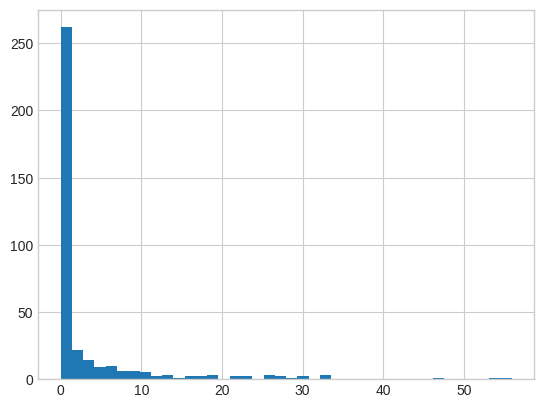

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.hist(rainfall_mm, 40)


## 6.1 对比操作
| Operator | Equivalent ufunc   |
|----------|--------------------|
| `==`     | `np.equal`         |
| `<`      | `np.less`          |
| `>`      | `np.greater`       |
| `!=`     | `np.not_equal`     |
| `<=`     | `np.less_equal`    |
| `>=`     | `np.greater_equal` |


In [3]:
x = np.array([1, 2, 3, 4, 5])


In [4]:
x < 3


array([ True,  True, False, False, False])

In [5]:
x > 3


array([False, False, False,  True,  True])

In [6]:
x <= 3


array([ True,  True,  True, False, False])

In [7]:
x >= 3


array([False, False,  True,  True,  True])

In [8]:
x != 3


array([ True,  True, False,  True,  True])

In [9]:
x == 3


array([False, False,  True, False, False])

In [10]:
(2 * x) == (x ** 2)


array([False,  True, False, False, False])

In [11]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3, 4))
x


array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [12]:
x < 6


array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

## 6.2 使用布尔数组
- 计算`true`元素的数目
    - `np.count_nonzero(::BoolArray)`
    - `np.sum(::BoolArray)`
- 是否含有`true`?
    - `np.any(::BoolArray)` 是否含有`true`
    - `np.all(::BoolArray)` 是否全为`true`
- 布尔操作

| Operator | Equivalent ufunc |
|----------|------------------|
| `&`      | `np.bitwise_and` |
| `\|`     | `np.bitwise_or`  |
| `^`      | `np.bitwise_xor` |
| `~`      | `np.bitwise_not` |


In [13]:
print(x)


[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]


In [14]:
np.count_nonzero(x < 6)


8

In [15]:
np.sum(x < 6)


8

In [16]:
np.sum(x < 6, axis=1)


array([3, 2, 3])

In [17]:
np.any(x > 8)


True

In [18]:
np.any(x < 0)


False

In [19]:
np.all(x < 10)


True

In [20]:
np.all(x == 6)


False

In [21]:
np.all(x < 8, axis=1)


array([False, False,  True])

In [22]:
np.sum((rainfall_mm > 10) & (rainfall_mm < 20))


16

In [23]:
np.sum(~((rainfall_mm <= 10) | (rainfall_mm >= 20)))


16

In [24]:
print("Number days without rain  : ", np.sum(rainfall_mm == 0))
print("Number days with rain     : ", np.sum(rainfall_mm != 0))
print("Days with more than 10 mm : ", np.sum(rainfall_mm > 0))
print("Rainy days with < 5 mm    : ", np.sum(
    (rainfall_mm > 0) & (rainfall_mm < 5)))


Number days without rain  :  221
Number days with rain     :  144
Days with more than 10 mm :  144
Rainy days with < 5 mm    :  83


## 6.3 利用布尔值筛选数据

In [25]:
x


array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [26]:
x[x < 5]


array([4, 0, 3, 3, 1, 3, 4, 0])

In [27]:
rainy = (rainfall_mm > 0)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2015 (mm)   : ",
      np.median(rainfall_mm[rainy]))
print("Median precip on summer days in 2015 (mm)  : ",
      np.median(rainfall_mm[summer]))
print("Maximum precip on summer days in 2015 (mm) : ",
      np.max(rainfall_mm[summer]))
print("Median precip on non-summer rany days (mm) : ",
      np.median(rainfall_mm[rainy & ~summer]))


Median precip on rainy days in 2015 (mm)   :  3.8
Median precip on summer days in 2015 (mm)  :  0.0
Maximum precip on summer days in 2015 (mm) :  32.5
Median precip on non-summer rany days (mm) :  4.1


## 6.4 `and` `or` 与 `&` `|`
- **区别**：`and` 和 `or` 作用于整个对象，而 `&` 和 `|` 作用于对象中的元素

In [28]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)


In [29]:
A or B


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [30]:
A & B


array([ True, False,  True, False,  True, False])